### IAPPT
Este archivo contiene la creacion y entrenamiento del modelo que usamos para determinar si la mano esta en posicion de piedra, papel o tijera.
Antes de nada ejecutaremos los imports necesarios.

In [106]:
import tensorflow as tf
import common.constants as const
import pandas as pd

# Keras 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


### Datasets
Primero hemos de entender que datos estamos pasando a nuestro modelo exactamente.
Mediante mediapie obtenemos una serie de puntos llamados landmarks, cada uno con un numero representandolo. 

![alt text](https://google.github.io/mediapipe/images/mobile/hand_landmarks.png)

Para obtener y guardar estos datos en el csv se encarga el ejecutable ```csv_generator.py```.
De todos estos landmarks solo usaremos estos: 6,8,10,12,14,16,18,20.

In [127]:
# A almacenamos los datos de los ficheros
data_train = pd.read_csv(const.TRAINING_CSV)
data_eval = pd.read_csv(const.EVALUATION_CSV)
data_train.sample(5)

,GESTO,WRIST_Y,WRIST_X,INDEX_FINGER_PIP_Y,INDEX_FINGER_PIP_X,INDEX_FINGER_TIP_Y,INDEX_FINGER_TIP_X,MIDDLE_FINGER_PIP_Y,MIDDLE_FINGER_PIP_X,MIDDLE_FINGER_TIP_Y,MIDDLE_FINGER_TIP_X,RING_FINGER_PIP_Y,RING_FINGER_PIP_X,RING_FINGER_TIP_Y,RING_FINGER_TIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_TIP_Y,PINKY_FINGER_TIP_X
1563,2,0.666055,0.470268,0.304501,0.602521,0.151832,0.628949,0.289262,0.496408,0.132219,0.507234,0.393042,0.454104,0.483559,0.479334,0.420759,0.412713,0.493774,0.432312
40,1,0.783609,0.415445,0.343628,0.726799,0.134432,0.820450,0.294975,0.568657,0.098290,0.648123,0.304179,0.421599,0.096325,0.462775,0.332118,0.339511,0.174820,0.363310
1206,2,0.883371,0.329325,0.396216,0.584784,0.187637,0.647807,0.352024,0.440335,0.099070,0.452683,0.463452,0.267515,0.564538,0.272627,0.502924,0.178226,0.602494,0.211154
2113,0,0.761106,0.459488,0.354625,0.604765,0.327055,0.593124,0.321168,0.456833,0.310171,0.448718,0.356851,0.359663,0.358826,0.390426,0.435792,0.292961,0.447588,0.343993
1290,2,0.727582,0.374759,0.334400,0.556485,0.155077,0.608830,0.306088,0.389295,0.151168,0.367718,0.335146,0.333599,0.335603,0.392049,0.375521,0.307907,0.368472,0.364772


Antes de usar el dataset eliminamos la columna que representa el resultado y la almacenamos en una variable



In [108]:
# Eliminamos el campo con el resultado y lo almacenamos
train_y = to_categorical(data_train.pop('gesto'))
eval_y = to_categorical(data_eval.pop('gesto'))

###  Creando el modelo
Usaremos un modelo secuencial con cuatro capas ```1 input``` (la cual se crea de manera implicita), ```2 ocultas``` y ```1 output``` con 
Los parametros son estos:

- ```10/5/3``` representa la cantidad de nodos de esta capa.

- ```input_dim``` cantidad de parametros en la entrada.

- ```activation``` una funcion de activacion es la que opera los parametros del nodo, este parametro especifica que tipo de funcion usamos.

- ```optimizer``` los optimizadores son algoritmos usados para disminuir errores del modelo.

- ```loss``` funcion utilizada para cuantificar como de bueno es el desempeño del modelo, cuanto mas cercano es a 0 mejor.

- ```metrics``` es el objetivo del modelo (precision en este caso). 

In [109]:
tf.keras.backend.clear_session()

In [110]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=18))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Mostrar estructura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

Aqui es donde empieza a aprender y clasificar.
Para ello se llama con el metodo ```fit()``` con los siguientes parametros:

- ```data_train``` es el dataset con los landmarks.

- ```train_y``` contiene la columna con el dato de gesto para que el modelo compruebe si acierta o falla.

- ```batch_size``` cantidad de filas de data_train que se procesan en cada paso.

- ```epochs``` numero de repeticiones sobre el dataset completo.

In [111]:
history = model.fit(data_train, train_y, epochs=10)

Epoch 1/10
72/72 [==============================] - 0s 776us/step - loss: 1.0578 - accuracy: 0.5255
Epoch 2/10
72/72 [==============================] - 0s 927us/step - loss: 0.9689 - accuracy: 0.7250
Epoch 3/10
72/72 [==============================] - 0s 974us/step - loss: 0.8506 - accuracy: 0.8581
Epoch 4/10
72/72 [==============================] - 0s 887us/step - loss: 0.6676 - accuracy: 0.9205
Epoch 5/10
72/72 [==============================] - 0s 873us/step - loss: 0.4688 - accuracy: 0.9649
Epoch 6/10
72/72 [==============================] - 0s 859us/step - loss: 0.3169 - accuracy: 0.9772
Epoch 7/10
72/72 [==============================] - 0s 873us/step - loss: 0.2217 - accuracy: 0.9851
Epoch 8/10
72/72 [==============================] - 0s 817us/step - loss: 0.1653 - accuracy: 0.9908
Epoch 9/10
72/72 [==============================] - 0s 955us/step - loss: 0.1253 - accuracy: 0.9917
Epoch 10/10
72/72 [==============================] - 0s 873us/step - loss: 0.1012 - accuracy: 0.9938

### Desempeño del modelo durante entrenamiento

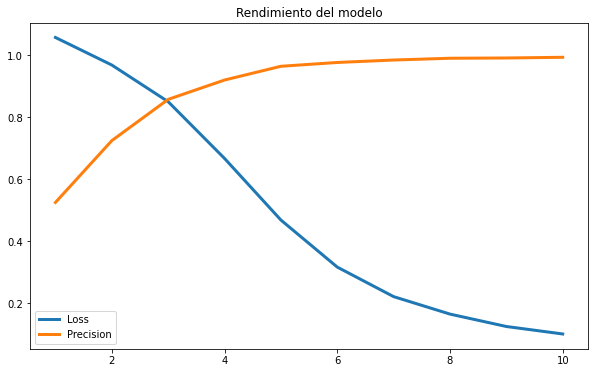

In [128]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Rendimiento del modelo')
plt.plot(np.arange(1, 11), history.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 11), history.history['accuracy'], label='Precision', lw=3)
plt.legend()

### Resultados
Para visualizar la precision del modelo mostrandole nuevos datos, ejecutamos esta celda.

In [ ]:
scores = model.evaluate(data_eval, eval_y, verbose=False)
print(f'Precision del modelo: {scores[1]:.4f}')  

### Guardar el modelo
Si estamos contentos con el rendimiento lo podemos guardar de esta manera:

In [125]:
model.save('model\\gesture_classifier.h5')

Ejecutando esta celda eliminaremos los modelos anteriores:

In [ ]:
import shutil
import os
try:
    shutil.rmtree('model')
except:
    print('Error eliminando carpeta model/')
os.mkdir('model')